<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

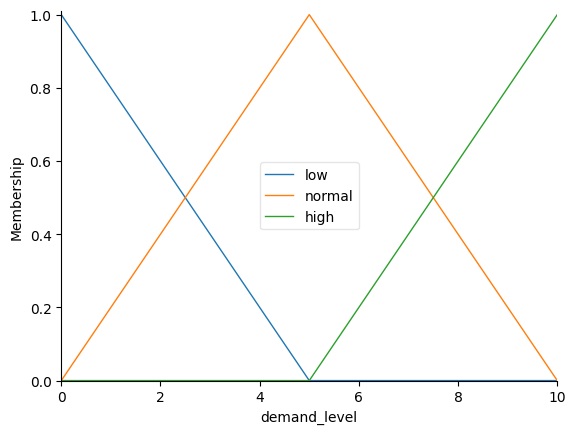

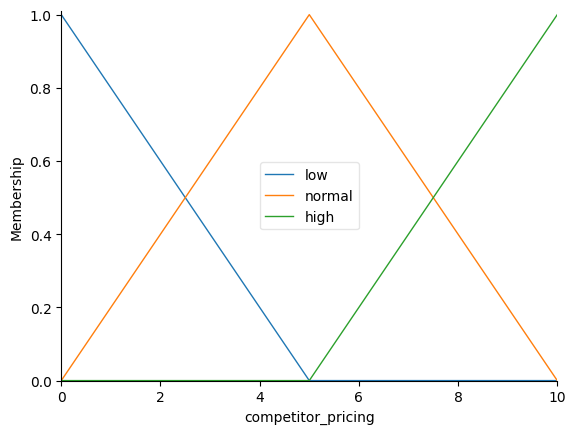

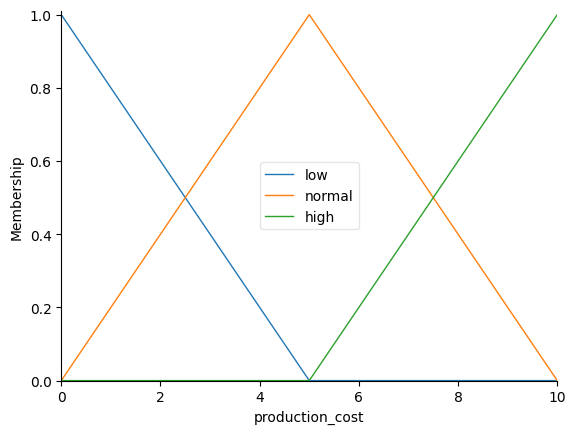

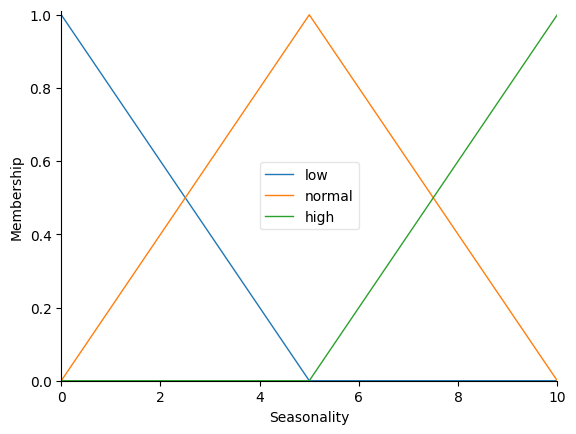

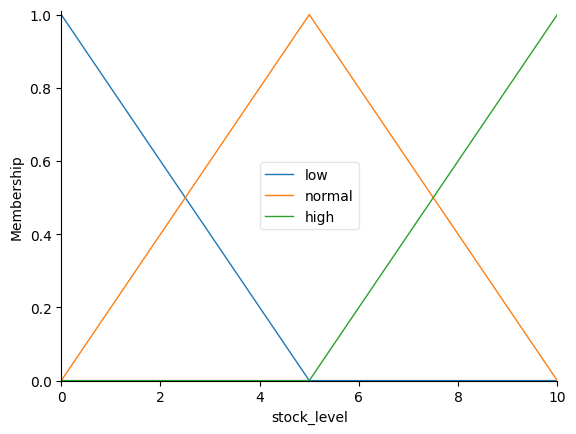

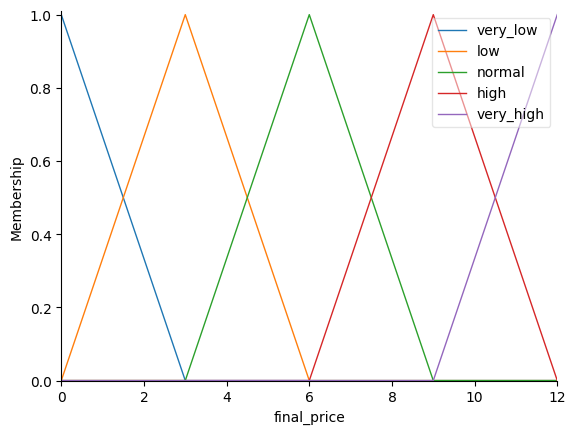

In [2]:
#2.3 Cham diem tin dung
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'demand_level')
competitor_pricing=ctrl.Antecedent(np.arange(0,10.1,0.1),'competitor_pricing')
production_cost=ctrl.Antecedent(np.arange(0,10.1,0.1),'production_cost')
Seasonality=ctrl.Antecedent(np.arange(0,10.1,0.1),'Seasonality')
stock_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'stock_level')
final_price=ctrl.Consequent(np.arange(0,12.1,0.1),'final_price')
demand_level['low']=fuzz.trimf(demand_level.universe,[0,0,5])
demand_level['normal']=fuzz.trimf(demand_level.universe,[0,5,10])
demand_level['high']=fuzz.trimf(demand_level.universe,[5,10,10])
competitor_pricing['low']=fuzz.trimf(competitor_pricing.universe,[0,0,5])
competitor_pricing['normal']=fuzz.trimf(competitor_pricing.universe,[0,5,10])
competitor_pricing['high']=fuzz.trimf(competitor_pricing.universe,[5,10,10])
production_cost['low']=fuzz.trimf(production_cost.universe,[0,0,5])
production_cost['normal']=fuzz.trimf(production_cost.universe,[0,5,10])
production_cost['high']=fuzz.trimf(production_cost.universe,[5,10,10])
Seasonality['low']=fuzz.trimf(Seasonality.universe,[0,0,5])
Seasonality['normal']=fuzz.trimf(Seasonality.universe,[0,5,10])
Seasonality['high']=fuzz.trimf(Seasonality.universe,[5,10,10])
stock_level['low']=fuzz.trimf(stock_level.universe,[0,0,5])
stock_level['normal']=fuzz.trimf(stock_level.universe,[0,5,10])
stock_level['high']=fuzz.trimf(stock_level.universe,[5,10,10])
final_price['very_low']=fuzz.trimf(final_price.universe,[0,0,3])
final_price['low']=fuzz.trimf(final_price.universe,[0,3,6])
final_price['normal']=fuzz.trimf(final_price.universe,[3,6,9])
final_price['high']=fuzz.trimf(final_price.universe,[6,9,12])
final_price['very_high']=fuzz.trimf(final_price.universe,[9,12,12])
demand_level.view()
competitor_pricing.view()
production_cost.view()
Seasonality.view()
stock_level.view()
final_price.view()

Final Price: 5.830985915492964


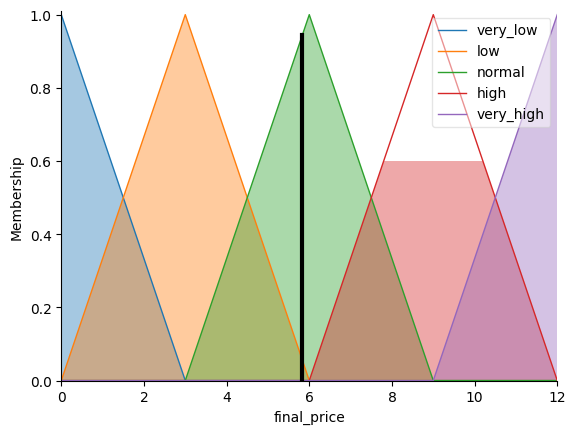

In [3]:
rule1=ctrl.Rule(demand_level['high']|competitor_pricing['high']|stock_level['low'],final_price['very_high'])
rule2=ctrl.Rule(demand_level['high']|Seasonality['high']|stock_level['low'],final_price['very_high'])
rule3=ctrl.Rule(demand_level['normal']|production_cost['high']|stock_level['low'],final_price['very_high'])
rule4=ctrl.Rule(demand_level['high']|competitor_pricing['normal']|stock_level['normal'],final_price['high'])
rule5=ctrl.Rule(demand_level['normal']|competitor_pricing['high']|stock_level['low'],final_price['high'])
rule6=ctrl.Rule(demand_level['normal']|competitor_pricing['high']|stock_level['low'],final_price['high'])
rule7=ctrl.Rule(demand_level['high']|Seasonality['high']|stock_level['normal'],final_price['high'])
rule8=ctrl.Rule(demand_level['normal']|competitor_pricing['normal']|stock_level['normal'],final_price['normal'])
rule9=ctrl.Rule(demand_level['low']|competitor_pricing['high']|stock_level['normal'],final_price['normal'])
rule10=ctrl.Rule(demand_level['low']|production_cost['normal']|stock_level['normal'],final_price['normal'])
rule11=ctrl.Rule(demand_level['low']|competitor_pricing['low']|stock_level['high'],final_price['low'])
rule12=ctrl.Rule(demand_level['normal']|production_cost['low']|stock_level['high'],final_price['low'])
rule13=ctrl.Rule(demand_level['low']|Seasonality['low']|stock_level['high'],final_price['low'])
rule14=ctrl.Rule(demand_level['low']|competitor_pricing['low']|stock_level['high'],final_price['very_low'])
rule15=ctrl.Rule(demand_level['low']|Seasonality['low']|stock_level['high'],final_price['very_low'])
rule16=ctrl.Rule(demand_level['normal']|competitor_pricing['low']|stock_level['high'],final_price['very_low'])
rule17=ctrl.Rule(demand_level['normal']|production_cost['low']|stock_level['high'],final_price['very_low'])
final_price_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
final_price_sim=ctrl.ControlSystemSimulation(final_price_ctrl)
final_price_sim.input['demand_level']=0
final_price_sim.input['competitor_pricing']=8
final_price_sim.input['production_cost']=10
final_price_sim.input['Seasonality']=4
final_price_sim.input['stock_level']=10
final_price_sim.compute()
print(f"Final Price: {final_price_sim.output['final_price']}")
final_price.view(sim=final_price_sim)